In [1]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, models, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import cv2
import time
import matplotlib.pyplot as plt

In [2]:
# Data Loader
import sys
#sys.path.insert(0, '/Users/pauli/Documents/Studium/Master/3. Semester Auslandssemester DTU/Deep Learning/Final Project/Otovo/')
#from autotetris.dataloader import RoofDataSet
from dataloader import RoofDataSet, show_centroids
from dataloader import Transforms
from modeltraining import Resnet18, model_resnet18, test_model
#from dataloader import RoofDataSet
#from dataloader import Transforms
#from dataloader import show_centroids
#from modeltraining import Resnet18, model_fit, model_resnet18

In [3]:
path = '/Users/pauli/Documents/Studium/Master/3. Semester Auslandssemester DTU/Deep Learning/Final Project/Otovo/data_updated/meta_data.hdf'
input_path = path
print(path)
#df = pd.read_hdf(path, '/d')
# centroid=df.iloc[:,6].values
# test = df.building_id.str.split('-b15',n = 1, expand = True)[0].tolist()
#centroid = np.array(df.panel_centroids.to_list())

/Users/pauli/Documents/Studium/Master/3. Semester Auslandssemester DTU/Deep Learning/Final Project/Otovo/data_updated/meta_data.hdf


In [4]:
dataset = RoofDataSet(path, transform=Transforms(new_size=(256,256)))
imp_path = dataset.image_paths +  "/"+dataset.id[0]+"-b15-otovowms.jpeg"
image = cv2.imread(imp_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

-------------------- Initializing dataset --------------------
--> Metadata read
--> Num_panels computed
--> Samples with many panels dropped
--> Padding samples
--> Dataset ready


In [5]:
# split the dataset into training, validation and test sets
# Create testset
len_test_set = int(0.1*len(dataset))
len_train_set = len(dataset) - len_test_set

train_dataset , test_dataset  = torch.utils.data.random_split(dataset, [len_train_set, len_test_set])

len_valid_set = int(0.2*len(train_dataset))
len_train_set = len(train_dataset) - len_valid_set

train_dataset, valid_dataset = torch.utils.data.random_split(train_dataset, [len_train_set, len_valid_set])

print("The length of Train set is {}".format(len_train_set))
print("The length of Valid set is {}".format(len_valid_set))
print("The length of Test set is {}".format(len_test_set))


# shuffle and batch the datasets
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

The length of Train set is 26740
The length of Valid set is 6685
The length of Test set is 3713


In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [7]:
image, centroid = next(iter(train_loader))
image.shape, centroid.shape

(torch.Size([50, 3, 256, 256]), torch.Size([50, 100, 2]))

torch.Size([3, 256, 256]) torch.Size([100, 2])


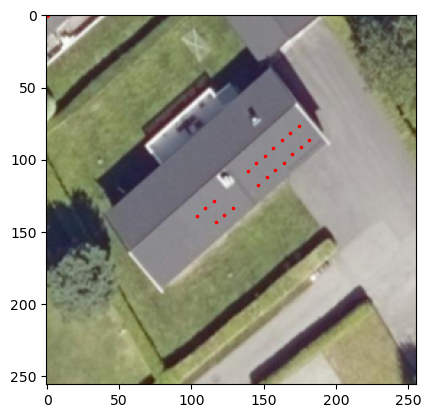

In [8]:
image, centroid = dataset[0]
print(image.shape, centroid.shape)
show_centroids(image, centroid, tensor=True)

In [9]:
network = Resnet18()
network.to(device)
# print(network)

# Adjust network parameter
criterion = nn.MSELoss()
optimizer = optim.Adam(network.parameters(), lr=0.0001)

loss_min = np.inf
num_epochs = 2

# Train model
model = model_resnet18(network, criterion, optimizer, num_epochs, train_loader, valid_loader, device)

torch.Size([50, 200])
Train Steps: 1/6  Loss: 5303.1118 torch.Size([50, 200])
Train Steps: 2/6  Loss: 5165.3923 torch.Size([50, 200])
Train Steps: 3/6  Loss: 5046.9268 torch.Size([50, 200])
Train Steps: 4/6  Loss: 5006.7310 torch.Size([50, 200])
Train Steps: 5/6  Loss: 5111.1410 torch.Size([48, 200])
Valid Steps: 2/2  Loss: 5495.2429 
--------------------------------------------------
Epoch: 1  Train Loss: 4910.4207  Valid Loss: 5495.2429
--------------------------------------------------
torch.Size([50, 200])
Train Steps: 1/6  Loss: 4545.0352 torch.Size([50, 200])
Train Steps: 2/6  Loss: 4740.2217 torch.Size([50, 200])
Train Steps: 3/6  Loss: 5014.7594 torch.Size([50, 200])
Train Steps: 4/6  Loss: 5011.7935 torch.Size([50, 200])
Train Steps: 5/6  Loss: 4915.7877 torch.Size([48, 200])
Valid Steps: 2/2  Loss: 5258.0547 
--------------------------------------------------
Epoch: 2  Train Loss: 4889.2095  Valid Loss: 5258.0547
--------------------------------------------------
Training Com

In [7]:
Path ="./trained_models/resnet_27_11_22.pt"
model = torch.load(Path, map_location=torch.device('cpu'))

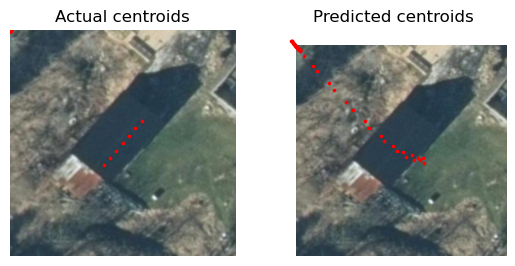

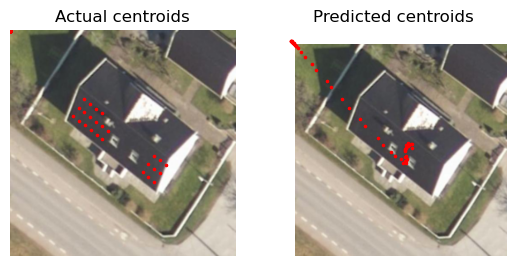

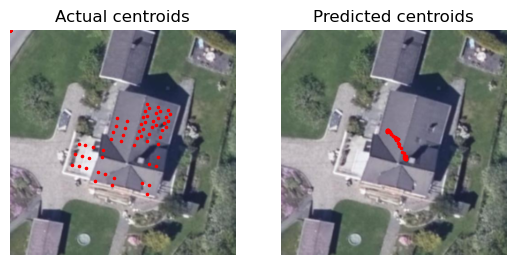

[tensor([[[ 1.4246e+02,  1.5546e+02],
          [ 1.3661e+02,  1.5501e+02],
          [ 1.3848e+02,  1.5118e+02],
          [ 1.3649e+02,  1.4852e+02],
          [ 1.3821e+02,  1.4340e+02],
          [ 1.3302e+02,  1.4161e+02],
          [ 1.3498e+02,  1.3388e+02],
          [ 1.2887e+02,  1.3037e+02],
          [ 1.2744e+02,  1.2319e+02],
          [ 1.2198e+02,  1.1772e+02],
          [ 1.1576e+02,  1.0748e+02],
          [ 1.0930e+02,  1.0325e+02],
          [ 9.9715e+01,  8.8685e+01],
          [ 9.1420e+01,  8.3647e+01],
          [ 7.7504e+01,  6.8738e+01],
          [ 6.8017e+01,  6.0280e+01],
          [ 5.3348e+01,  4.5775e+01],
          [ 4.4929e+01,  4.0169e+01],
          [ 3.0425e+01,  2.5718e+01],
          [ 2.3991e+01,  2.0299e+01],
          [ 1.1951e+01,  9.7635e+00],
          [ 5.6197e+00,  5.4109e+00],
          [-4.3744e-01, -2.9887e-01],
          [-3.0709e+00, -2.2958e+00],
          [-6.4490e+00, -5.2202e+00],
          [-6.6891e+00, -5.8035e+00],
          [-

In [8]:
test_model(model, test_loader, 3)

In [ ]:
# Model testing
Path ="./trained_models/resnet_first_22_11_22.pt"
model = torch.load(Path, map_location=torch.device('cpu'))
model

In [ ]:
iterator_c = iter(test_loader)
predictions = []
for step in range(1,2 + 1):
    image, centroids = next(iterator_c)
    prediction = model(image)
    #print(prediction)
    predictions.append(prediction.view(-1,50,2))
    #print(predictions)

    # Prepare data for plotting
    image = image.squeeze()
    image = image.permute(1, 2, 0)

    centroids = centroids.view(-1, 50, 2)
    print(centroids)
    centroids = centroids.numpy()
    #centroids = centroids[0]
    print(centroids)

    prediction = prediction.view(-1, 50, 2)
    prediction = prediction.detach().numpy()
    prediction = prediction[0]
    print(prediction)

    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(image)
    ax[0].scatter(centroids[:, 1], centroids[:, 0], s=10, marker='.', c='r')
    ax[0].set_title("Actual centroids")
    ax[0].axis("off")

    ax[1].imshow(image)
    ax[1].scatter(prediction[:, 1], prediction[:, 0], s=10, marker='.', c='r')
    ax[1].set_title("Predicted centroids")
    ax[1].axis("off")

    plt.show()

In [ ]:
image, centroid = next(iter(test_loader))
#centroid[0]
centroid
#centroid[0].view(-1, 50, 2)
#show_centroids(image, centroid, tensor=True)

In [ ]:
centroid